## OBJECTIVE 1: Import & QA the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the data from both tabs in the "Bank_Churn_Messy" Excel file

bank_cust_info = pd.read_excel("../Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx")
bank_acc_info = pd.read_excel("../Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx", sheet_name = 1)


bank_dictionary = pd.read_csv("../Downloads/Bank+Customer+Churn/Bank_Churn_Data_Dictionary.csv")
bank_churn = pd.read_csv("../Downloads/Bank+Customer+Churn/Bank_Churn.csv")

In [3]:
bank_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
bank_acc_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [5]:
# Use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column

churn_df = bank_cust_info.merge(bank_acc_info, how="left", on="CustomerId")
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [6]:
#Check for and remove duplicate rows and columns

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
churn_df[churn_df.duplicated(keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


## OBJECTIVE 2: Clean the data

In [8]:
#Check the data types for each column and make any necessary fixes

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [9]:
churn_df = churn_df.drop("Tenure_y", axis=1).rename({"Tenure_x":"Tenure"}, axis=1).drop_duplicates()

In [98]:
churn_df.shape

(10000, 13)

In [99]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [12]:
churn_df.EstimatedSalary = pd.to_numeric(churn_df.EstimatedSalary.str.replace("€", ""))
churn_df.Balance = pd.to_numeric(churn_df.Balance.str.replace("€", ""))

In [13]:
# Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median
churn_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [14]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [15]:
churn_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [16]:
churn_df[churn_df["Surname"].isna().any(axis=1) == True]

ValueError: No axis named 1 for object type Series

In [17]:
churn_df[churn_df["Age"].isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [18]:
churn_df = churn_df.fillna(value = {"Surname":"MISSING", "Age": churn_df["Age"].median()})

churn_df


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


In [19]:
# Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column.

churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [20]:
#look up at Age column, EstimatedSalary, Balance, Exied

churn_df[churn_df["EstimatedSalary"] < 0]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [21]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999.0, churn_df["EstimatedSalary"].median())
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,100191.725,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,100191.725,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,100191.725,0.00,1,Yes,Yes,0


In [22]:
# Combine any variations in country names in the "Geography" column to a single value per country
churn_df["Geography"].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [23]:
churn_df["Geography"] = np.where(churn_df["Geography"].isin(["FRA", "French", "France"]), "French", churn_df["Geography"])

In [24]:
# Cleaning up and summarise my code 

churn_df = (
    pd.read_excel("../Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx")
    .merge(pd.read_excel("../Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx", sheet_name = 1))
    .drop_duplicates()
    .drop("Tenure_y", axis=1)
    .rename({"Tenure_x": "Tenure"}, axis=1)
    .assign(
        EstimatedSalary= lambda x: x["EstimatedSalary"].str.replace("€", "").astype("float"),
        Balance = lambda x: x["Balance"].str.replace("€", "").astype("float"),
        Geography = lambda x: np.where(x["Geography"].isin(["France", "French", "FRA"]), "France", x["Geography"])
    )
    .assign(EstimatedSalary= lambda x: x["EstimatedSalary"].replace(-999999.0, x["EstimatedSalary"].median()))
)
churn_df = churn_df.fillna(values={"Surname":"MISSING", "Age": churn_df["Age"].median()})

KeyError: "['Tenure_y'] not found in axis"

## OBJECTIVE 3: Explore the Data

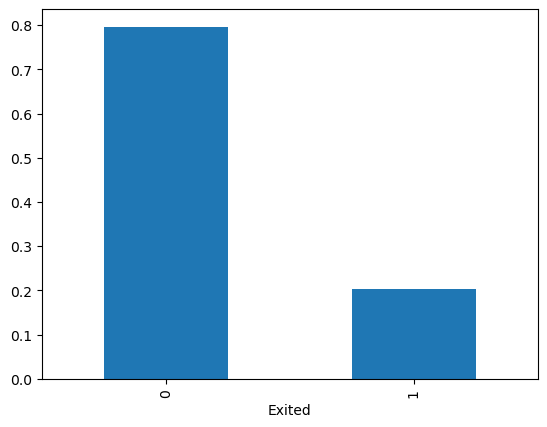

In [25]:
# Build a bar chart displaying the count of churners (Exited=1) vs. non-churners(Exited=0) 
churn_df["Exited"].value_counts(normalize=True).plot.bar();

In [26]:
# Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,French,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,French,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


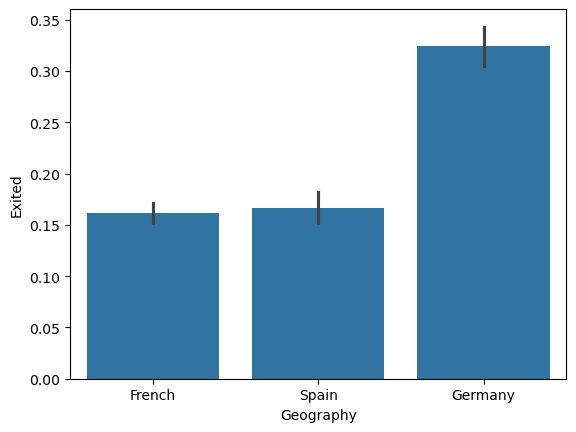

In [27]:
sns.barplot(data=churn_df, x="Geography", y="Exited");

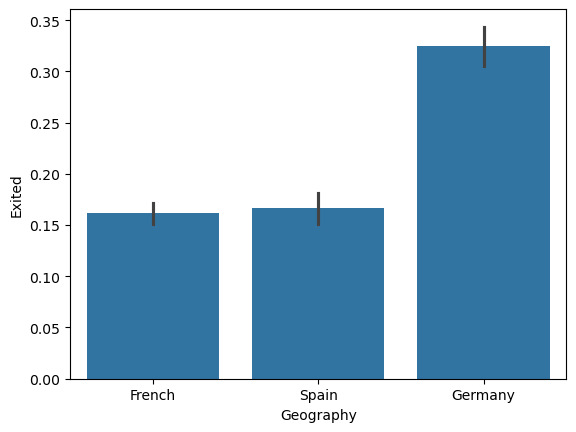

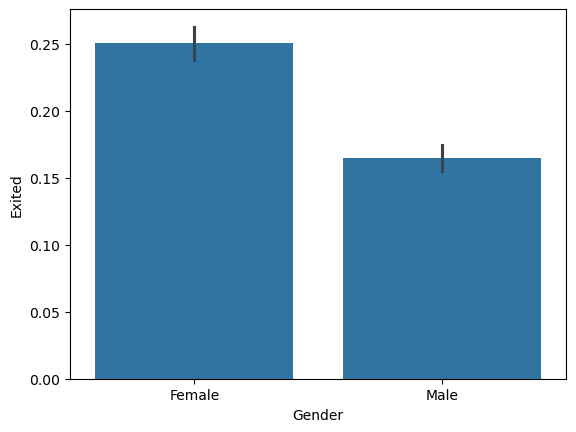

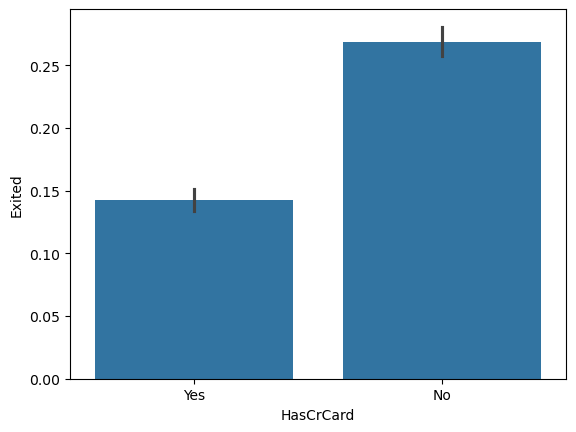

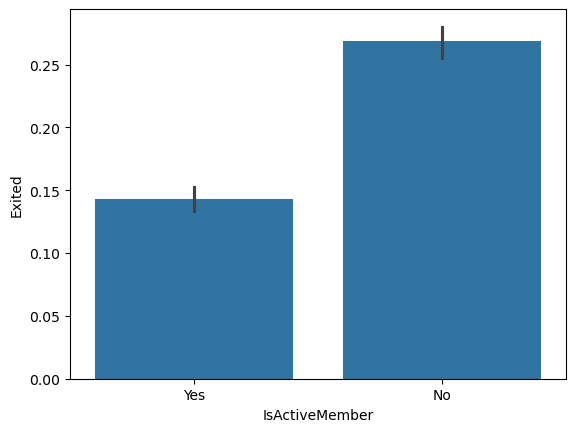

In [66]:
for col in churn_df.drop("Surname", axis=1).select_dtypes("object"):
    sns.barplot(churn_df, x=col, y="Exited")
    plt.show()

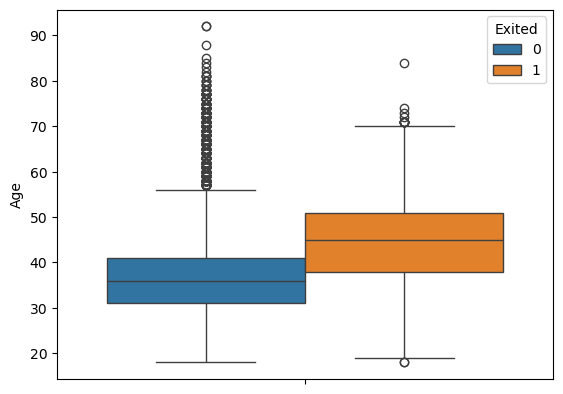

In [46]:
#Build box plots for each numeric field, broken out by churners vs. non-churners
sns.boxplot(churn_df, y="Age", hue="Exited");

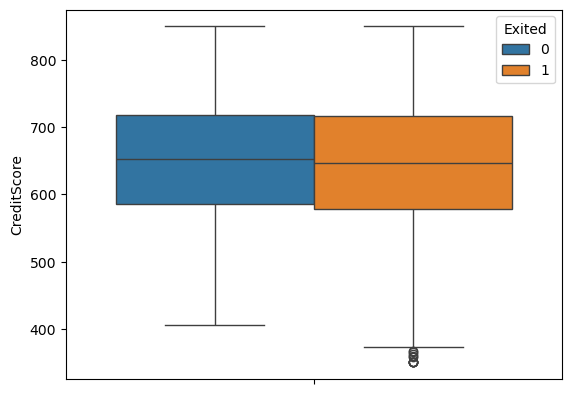

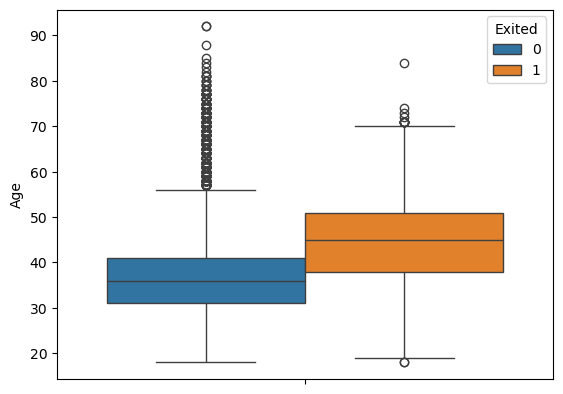

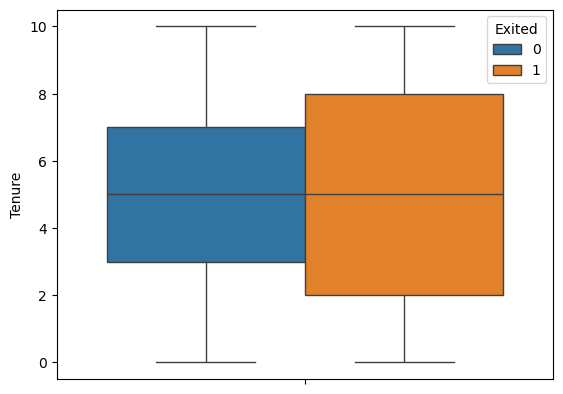

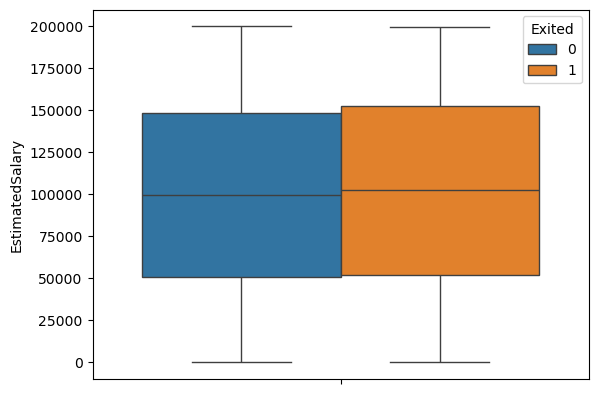

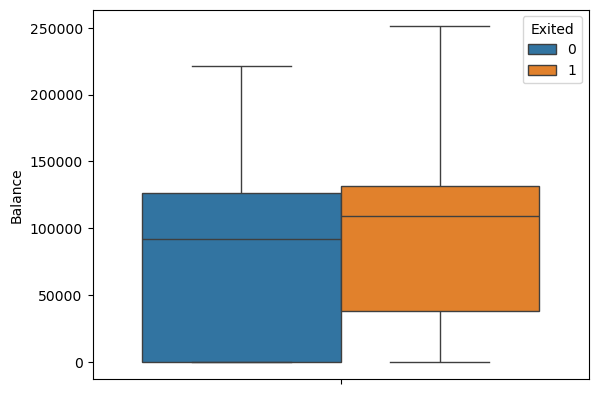

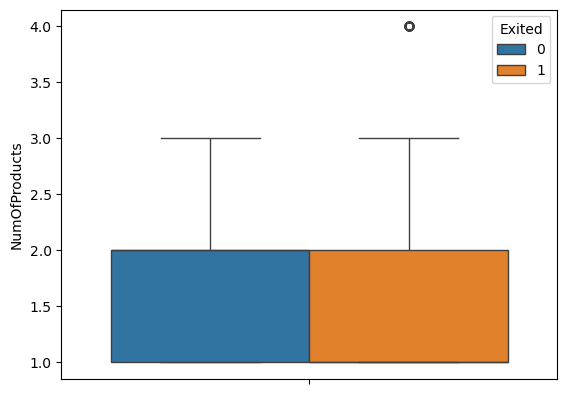

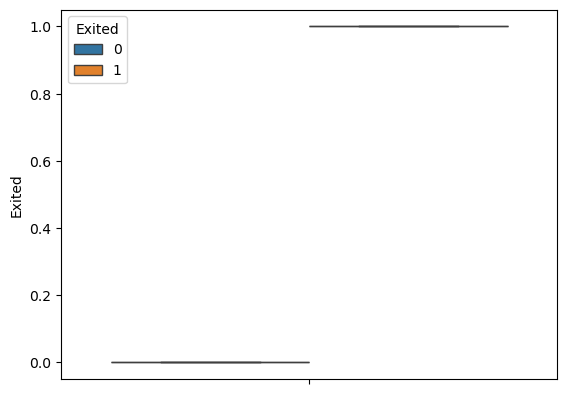

In [52]:
for col in  churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.boxplot(data=churn_df, y=col, hue="Exited")
    plt.show()

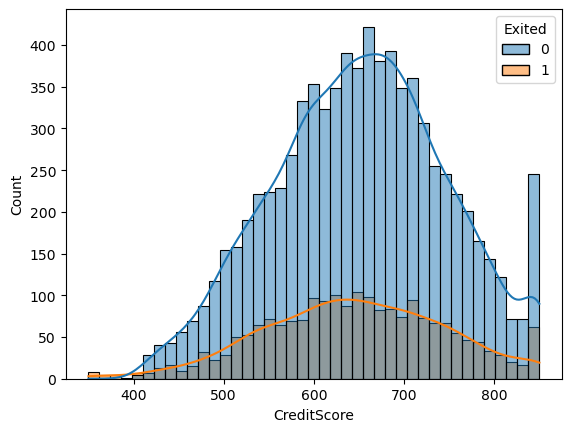

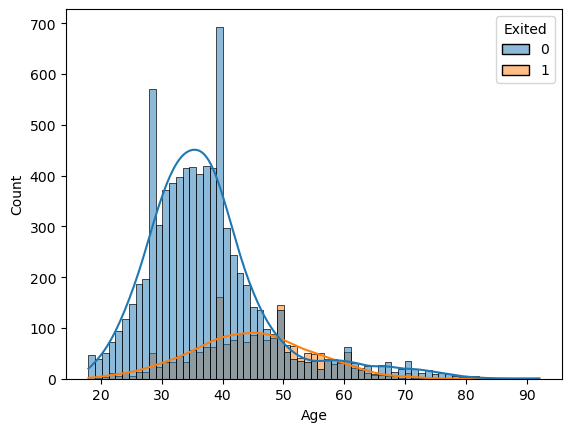

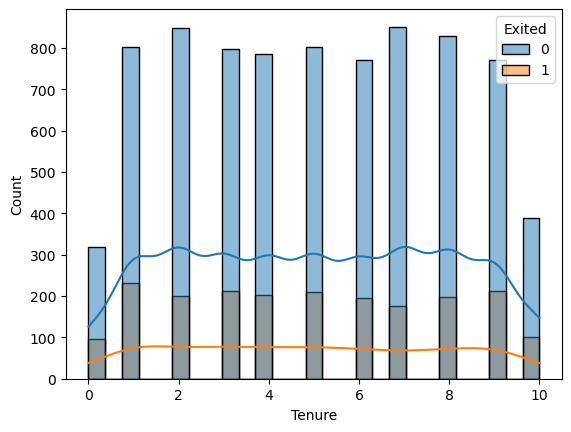

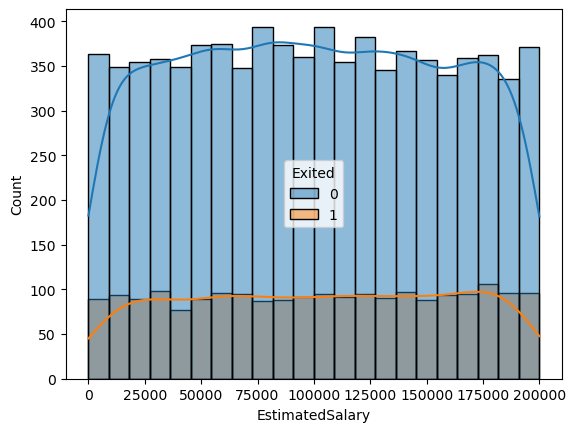

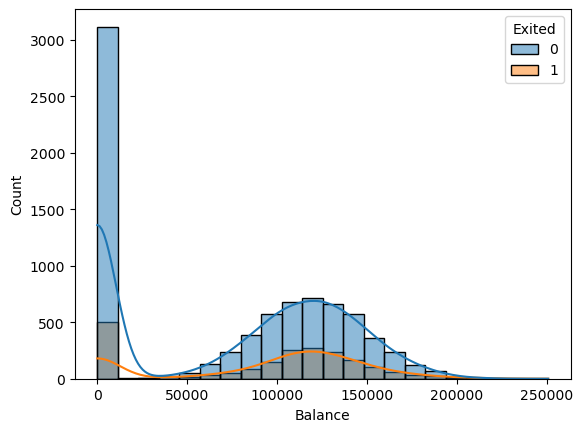

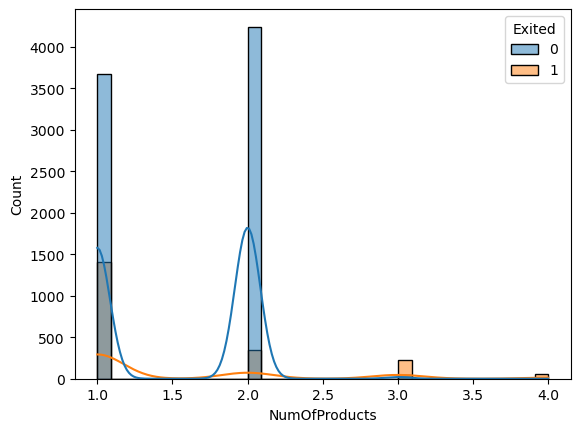

In [56]:
# Build histograms for each numeric field, broken out by churners vs. non-churners
for col in churn_df.drop(["CustomerId", "Exited"], axis=1).select_dtypes("number"):
    sns.histplot(data=churn_df, x=col, hue='Exited', kde=True)
    plt.show()


## OBJECTIVE 4: Prepare the data for modeling

In [57]:
#Create a new dataset that excludes any columns that aren’t be suitable for modeling
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,French,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,French,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [63]:
modeling_df = churn_df.drop(["CustomerId", "Surname"], axis=1)
modeling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,French,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,French,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [82]:
#Create dummy variables for categorical fields

modeling_df = pd.get_dummies(modeling_df, dtype="int", drop_first=True)

In [81]:
# modeling df sorted out

#regions= (pd.get_dummies(modeling_df[["CreditScore", "Geography"]], dtype="int")
          #.rename(columns={"Geography_French":"French", "Geography_Germany":"Germany", "Geography_Spain":"Spain"}))

#gender= (pd.get_dummies(modeling_df[["CreditScore", "Gender"]], dtype="int")
        #.rename(columns={"Gender_Female":"Female", "Gender_Male":"Male"}))

#member = (pd.get_dummies(modeling_df[["CreditScore", "IsActiveMember"]], dtype="int")
        #.rename(columns={"IsActiveMember_No":"No Active", "IsActiveMember_Yes":"Active"}))

In [84]:
#Create a new “balance_v_income” feature, which divides a customer’s bank balance by 
#their estimated salary, then visualize that feature vs. churn status

modeling_df["balance_v_income"] = modeling_df["Balance"] / modeling_df["EstimatedSalary"]
modeling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_income
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.401375
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.587055


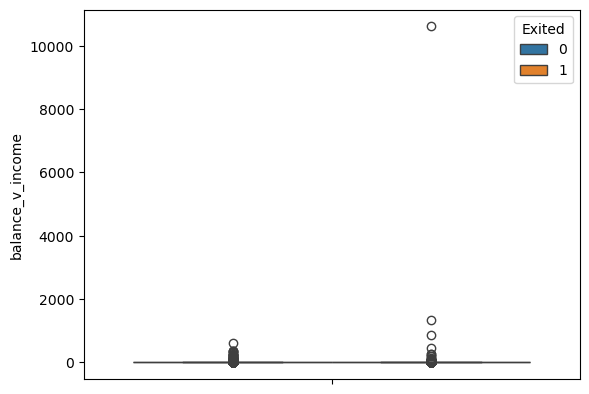

In [87]:
sns.boxplot(data= modeling_df,  y="balance_v_income", hue="Exited");

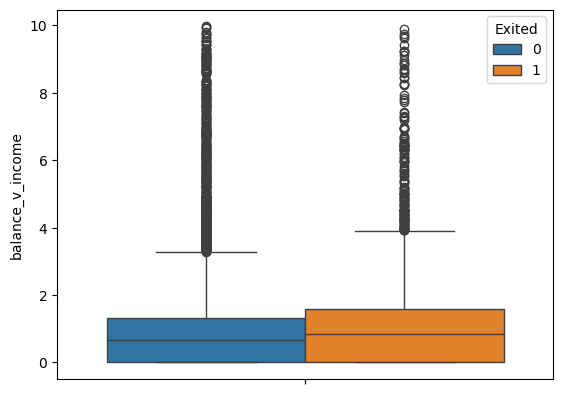

In [96]:
sns.boxplot(data=modeling_df.query("balance_v_income < 10"),  y="balance_v_income", hue="Exited");

In [88]:
modeling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,0.250900,0.247700,0.545700,0.515100,0.515100,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,0.433553,0.431698,0.497932,0.499797,0.499797,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10614.655440


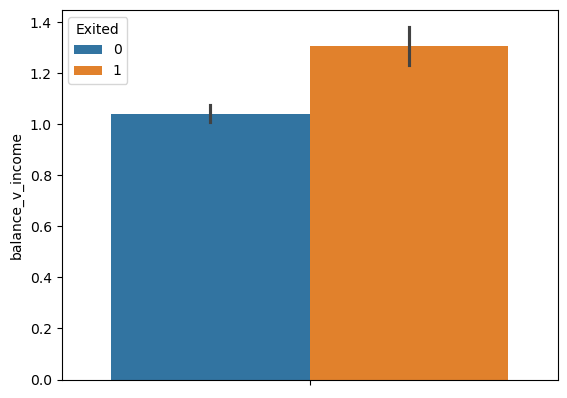

In [95]:
sns.barplot(data=modeling_df.query("balance_v_income < 10"),  y="balance_v_income", hue="Exited");